In [1]:
#KNN 알고리즘
#K를 보통 홀수(3 이상)으로 둠
#짝수로 하면 의견 충돌이 일어날 수 있기때문

In [2]:
from sklearn.datasets import load_iris 

In [4]:
iris = load_iris()

In [6]:
print(dir(iris))
#x data는 data안에, y data는 target안에

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [7]:
X = iris.data
y = iris.target

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
#정확도 (Accuracy) 구하는 방법
knn.score(X_test, y_test)

0.9736842105263158

In [25]:
import numpy as np

In [26]:
#Accuracy를 구하는 또 다른 방법
np.mean(y_test == knn.predict(X_test))

0.9736842105263158

In [28]:
#y_test는 train_test_split으로 나눈 실제 정답지
#X_test는 예상
#따라서 X_test를 예상하여 predict를 한것이 y_test와 같다면
[y_test == knn.predict(X_test)] #이것의 평균값이 accuracy

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False])]

In [29]:
np.sum(y_test == knn.predict(X_test))

37

In [31]:
np.sum(y_test == knn.predict(X_test))/len(y_test == knn.predict(X_test))

0.9736842105263158

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, knn.predict(X_test))

0.9736842105263158

In [55]:
train_accuracy = []
test_accuracy = []
neighbors = range(1,11)

In [56]:
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

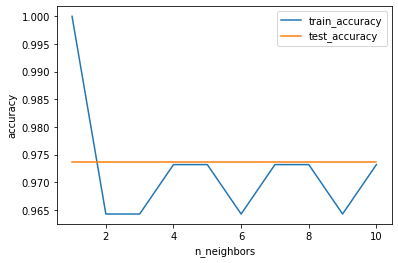

In [58]:
plt.plot(neighbors, train_accuracy, label='train_accuracy')
plt.plot(neighbors, test_accuracy, label='test_accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
y_predict = knn.predict(X_test)

In [65]:
len(X_test)

38

In [67]:
confusion_matrix(y_test, y_predict)
#가로가 의미는 true인 갯수, 세로 예측값 의미, 인덱스 값이 결국 인코딩한 인덱스 값을 의미한다

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [69]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [70]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
k_range = list(range(1,31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [74]:
param_grid = dict(n_neighbors = k_range)
#gridSearchCV 요구하는 하이퍼파라메타의 형식 dict
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [77]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [78]:
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [79]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [80]:
import pandas as pd

In [81]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','params','rank_test_score']]

,mean_test_score,params,rank_test_score
0,0.960000,{'n_neighbors': 1},24
1,0.953333,{'n_neighbors': 2},27
2,0.966667,{'n_neighbors': 3},18
3,0.966667,{'n_neighbors': 4},18
4,0.966667,{'n_neighbors': 5},12
5,0.966667,{'n_neighbors': 6},12
6,0.966667,{'n_neighbors': 7},12
7,0.966667,{'n_neighbors': 8},12
8,0.973333,{'n_neighbors': 9},4
9,0.966667,{'n_neighbors': 10},12


In [83]:
grid_mean_scores = grid.cv_results_['mean_test_score']

Text(0, 0.5, 'Cross-validated Accuracy')

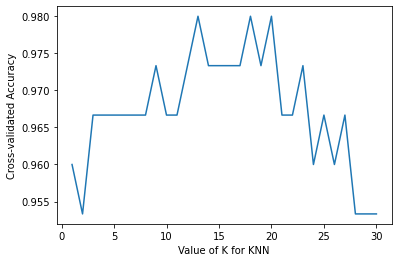

In [84]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated Accuracy')

In [88]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


In [86]:
grid.predict([[5.0, 3.4, 1.3, 0.1]])

array([0])

In [87]:
knn.predict([[5.0, 3.4, 1.3, 0.1]])

array([0])

In [90]:
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']

In [92]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [94]:
grid=GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [95]:
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [96]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953333,0.052068,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.960000,0.053333,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'distance'}"
